# MNIST Classification with ANN

Here, I implement the classic neural network, a classification model for MNIST dataset of handwritten digits. The model is implemented using Keras, a high-level neural networks API, running on top of TensorFlow backend.

In order to use a simple ANN for this task, we will flatten the 28x28 images into 1D vectors of size 784. Our model will have 3 fully connected dense layers, as well as one drop out layer to prevent overfitting. The intermediate layers will use ReLU activation function, while the output layer will use softmax activation function. The prediction will be the class with the highest probability in the output layer. The model will be trained using Adam optimizer and sparse categorical cross entropy loss function. The model will be trained for 10 epochs with a batch size of 128. The model will be evaluated on the test set.

An illustration of the model is below:

![image.png](pt1_ann.png)

In [3]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Load the MNIST Data

In [41]:
# load data
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

The first train label is 5


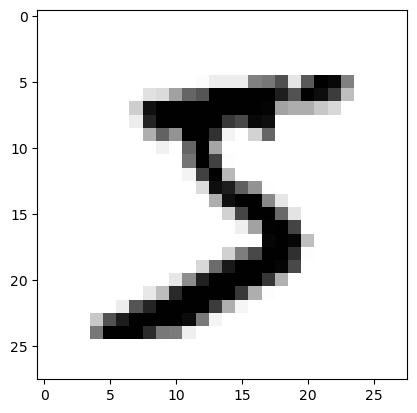

In [97]:
# investigate the data


# This is a dataset of 60,000 28x28 grayscale images of the 10 digits
# along with a test set of 10,000 images. 
# More info can be found at the MNIST homepage.

# Tuple of tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

data 
# tuple of tuples
# ((x_train, y_train), (x_test, y_test))

data[0]
# tuple of numpy arrays numpy.ndarray
# (x_train, y_train)

x_train = data[0][0] 
# x_train
# numpy.ndarray
# shape (60000, 28, 28)

x_train[0]
# first image
# numpy.ndarray
# shape (28, 28)

x_train[0][0]
# first row of pixels
# numpy.ndarray
# shape (28,)

x_train[0][0][0]
# first pixel
# numpy.uint8
# ()
# value 0

y_train = data[0][1]
# y_train
# numpy.ndarray
# shape (60000,)
# dtype uint8

y_train[0]
# first label
# numpy.uint8
# ()
# value 5

x_test = data[1][0]
y_test = data[1][1]

# print out a sample image

plt.imshow(x_train[1], cmap=plt.cm.binary)
print("The first train label is " + str(y_train[1]))

x_train_norm is :  (60000, 28, 28)
y_train is :  (60000,)
x_test_norm is :  (10000, 28, 28)
y_test is :  (10000,)
y_test[0] is :  7
x_test_norm[0] is : 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.       

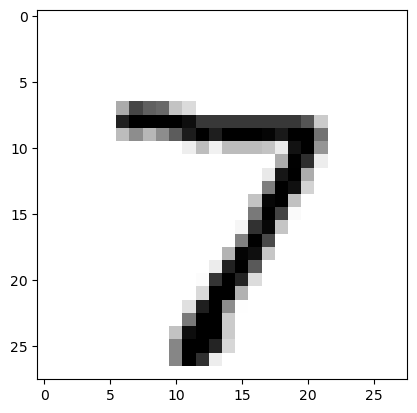

In [107]:
# Normalize the image data
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# check max value of first image
x_train_norm[0].max()

# define inputs and outputs
num_classes = 10
input_shape = (28, 28, 1)

# print x_train, y_train, x_test, y_test
print("x_train_norm is : ", x_train_norm.shape)
print("y_train is : ", y_train.shape)
print("x_test_norm is : ", x_test_norm.shape)
print("y_test is : ", y_test.shape)

# print the first value of each
print("y_test[0] is : ", y_test[0])
print("x_test_norm[0] is : ")
print(x_test_norm[0])
plt.imshow(x_test_norm[0], cmap=plt.cm.binary)



## Create the ANN Model with Keras

In [117]:
# clean out previous models
keras.backend.clear_session()

# https://keras.io/guides/sequential_model/
ann = keras.Sequential()

# flatten the data into a 1D array of 28x28 = 784 pixels
# since we're not using a convolutional neural network here
# https://keras.io/api/layers/reshaping_layers/flatten/
ann.add(layers.Flatten(input_shape=(28, 28)))

# https://keras.io/api/layers/core_layers/dense/
ann.add(layers.Dense(256, activation="relu"))

# https://keras.io/api/layers/regularization_layers/dropout/
ann.add(layers.Dropout(0.2))

# https://keras.io/api/layers/core_layers/dense/
ann.add(layers.Dense(128, activation="relu"))

# https://keras.io/api/layers/core_layers/dense/
ann.add(layers.Dense(10, activation="softmax"))

ann.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the Model

In [118]:
ann.compile(
    # use sparese categorical crossentropy for integer labels
    # https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other 
    loss="sparse_categorical_crossentropy",
    # use adam optimizer
    optimizer="adam",
    # define accuracy as the success metric
    metrics=["accuracy"]
)

## Fit the Model to the Training Data

In [119]:
# train the model
# https://keras.io/api/models/model_training_apis/
history = ann.fit(
    # training data
    x_train_norm,
    y_train,
    # number of epochs
    epochs=10,
    # batch size
    batch_size=128,
    # validation data
    validation_data = (x_test_norm, y_test),
    # verbose
    verbose=1
)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3070 - accuracy: 0.9107 - val_loss: 0.1280 - val_accuracy: 0.9624
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1250 - accuracy: 0.9618 - val_loss: 0.0960 - val_accuracy: 0.9703
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0888 - accuracy: 0.9727 - val_loss: 0.0752 - val_accuracy: 0.9767
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0673 - val_accuracy: 0.9788
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9841 - val_loss: 0.0721 - val_accuracy: 0.9792
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0639 - val_accuracy: 0.9803
Epoch 

## Evaluate the Model with Predictions

In [120]:
# evaluate the model
predictions = ann.predict(x_test_norm)
score = ann.evaluate(x_test_norm, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9804


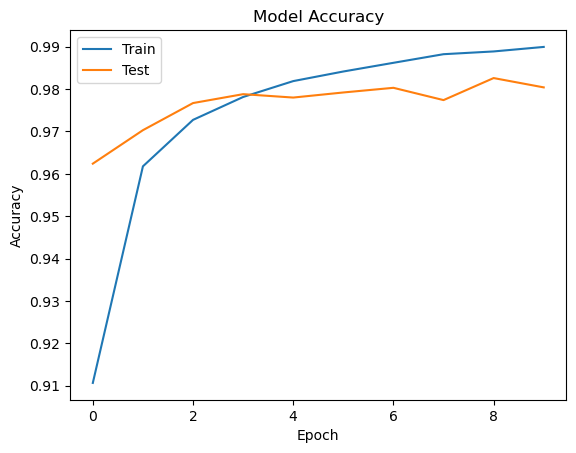

In [121]:
# visualize the accuracy and loss over the epochs
# https://keras.io/api/visualization/keras_viz_history/
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("ANN Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

[[ 968    1    4    1    0    1    1    2    2    0]
 [   0 1123    3    1    0    0    4    0    4    0]
 [   0    0 1023    3    1    0    0    3    2    0]
 [   0    0    3  993    0    5    0    4    3    2]
 [   0    0    4    1  972    0    2    1    0    2]
 [   1    0    0   12    2  871    2    1    1    2]
 [   1    2    1    1    3    4  944    0    2    0]
 [   0    4   14    4    3    0    0  998    2    3]
 [   0    0    7    5    4    3    3    3  947    2]
 [   1    2    1    6   21    2    0    8    3  965]]


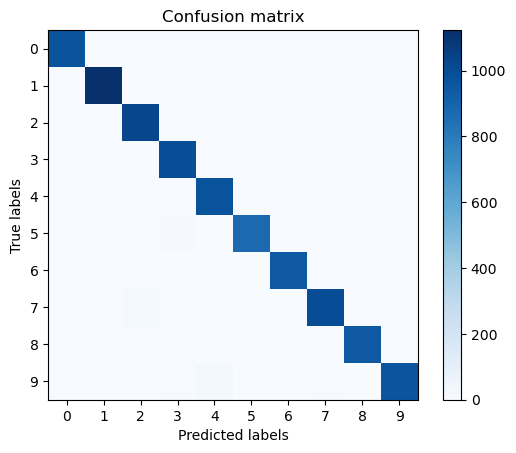

In [122]:
# create a confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
print(cm)

# plot a pretty confusion matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.title("Confusion matrix")
plt.colorbar()
plt.show()


## Results

Our model does quite well, achieving an accuracy of 98.04% on the test data. I also tried a few other parameters that performed less well, such as:
- Using 2 dense layers instead of 3 -- worse results
- Using 128 and 64 units in the dense layers instead of 256 and 128 -- worse results
- Using 2 dropout layers instead of 1 -- worse results
- Using 0.2 dropout rate instead of 0.5 -- reduced test accuracy to 97.67%, reduced test accuracy to 97.98%
- Using 0 dropout layers instead of 1 -- improved accuracy on train data to 99.54%, reduced accuracy on test data to 97.74%


Overall, This is a strong result, especially considering that we used a simple ANN ann. With an ANN, we had to flatten the data, and thus we lose the intuition of a 2-dimensional image. In the next section, we'll use an CNN model, which will allow us to keep the 2-dimensional structure of the data and see if we can improve the accuracy of the ann. 

## Export to HTML

In [1]:
# export to HTML for webpage
import os

# os.system('jupyter nbconvert --to html mod1.ipynb')
os.system('jupyter nbconvert --to html pt1_ann.ipynb --HTMLExporter.theme=dark')

[NbConvertApp] Converting notebook pt1_ann.ipynb to html
[NbConvertApp] Writing 700801 bytes to pt1_ann.html


0